# Amazon reviews on Women dresses 
### (23K Datapoints)


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [153]:
SNS_PALETTE='magma'
sns.set(context='notebook', style='dark', palette=SNS_PALETTE, font='sans-serif', font_scale=1, color_codes=False, rc=None)

## Loading Data

In [345]:
dressesData = pd.read_csv('../input/women_dresses_data.csv')

In [346]:
dressesData.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [394]:
dressesData.columns = [i.split(' ')[0] for i in dressesData.columns]

### About this file

* s.no: Index

* age: Age of the customer.

* division_name: Division of the Cloth customer has bought

* department_name: Department of the Cloth

* class_name: Class of the Cloth in particular.

* clothing_id: Clothing ID (Unique to a type of product)

* title: Title customers write on their feedback/review text

* review_text: Customer's Review Text

* alikefeedbackcount: Number of other customers who agrees with the given feedback (as their experience is quite the same)

* rating: Rating or stars they've given to the product

* recommend_index: Whether they'll recommend someone to buy the product or not (0: NO, 1:YES)

***thx https://www.kaggle.com/code/flaviocavalcante/amazon-reviews-eda***

## Data Preprocessing

In [347]:
dressesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [348]:
# unique value 
for i in dressesData.columns:
    print(i, len(dressesData[i].unique()))

s.no 23486
age 77
division_name 4
department_name 7
class_name 21
clothing_id 1206
title 13994
review_text 22635
alike_feedback_count 82
rating 5
recommend_index  2


In [349]:
# Nan value
dressesData.isna().sum()

s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

In [350]:
dressesData = dressesData.dropna(subset=['division_name', 'department_name', 'class_name'])

In [351]:
dressesData['division_name'] = dressesData['division_name'].astype('category')
dressesData['department_name'] = dressesData['department_name'].astype('category')
dressesData['class_name'] = dressesData['class_name'].astype('category')

In [352]:
dressesData.describe()

,s.no,age,clothing_id,alike_feedback_count,rating,recommend_index
count,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000
mean,11742.275349,43.200707,918.486665,2.537151,4.195552,0.822256
std,6779.370967,12.280913,202.727678,5.703597,1.110188,0.382305
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000
25%,5871.750000,34.000000,861.000000,0.000000,4.000000,1.000000
50%,11742.500000,41.000000,936.000000,1.000000,5.000000,1.000000
75%,17613.250000,52.000000,1078.000000,3.000000,5.000000,1.000000
max,23485.000000,99.000000,1205.000000,122.000000,5.000000,1.000000


## Data Exploration and Analysis

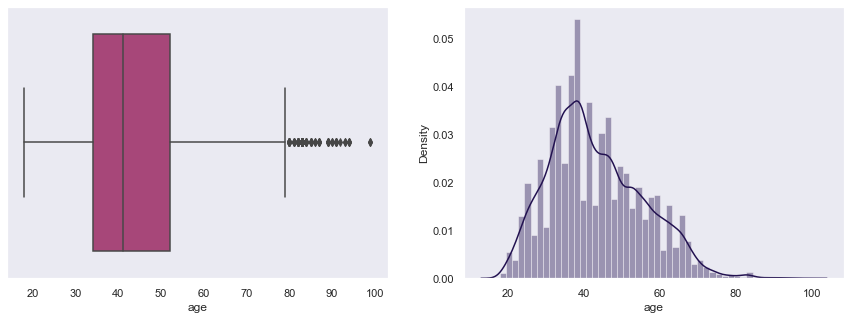

In [353]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(dressesData['age'], palette=SNS_PALETTE, ax=ax[0])
sns.distplot(dressesData['age'], ax=ax[1])
plt.show()

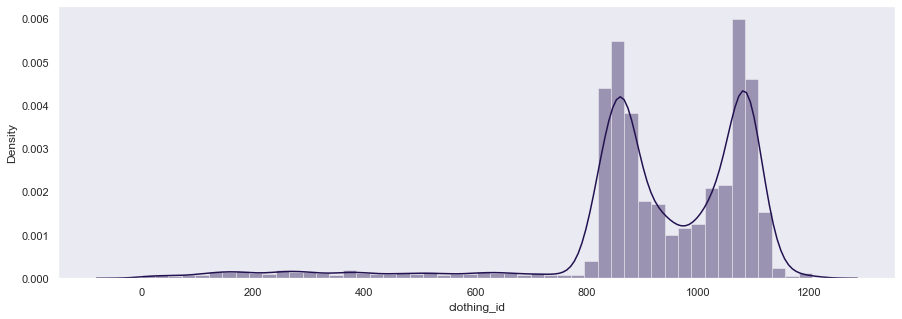

In [354]:
plt.figure(figsize=(15, 5))
sns.distplot(dressesData['clothing_id'])
plt.show()

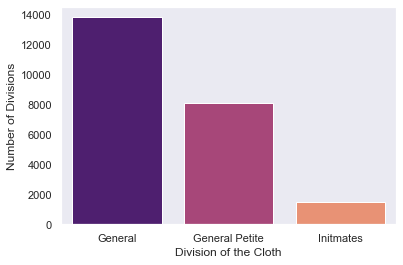

In [355]:
ax = sns.countplot(dressesData['division_name'], palette=SNS_PALETTE)
ax.set(xlabel='Division of the Cloth',
       ylabel = 'Number of Divisions')
plt.show()

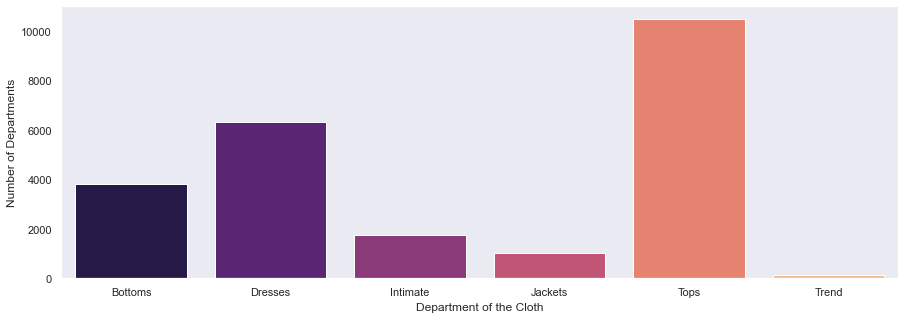

In [356]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(dressesData['department_name'], palette=SNS_PALETTE)
ax.set(xlabel='Department of the Cloth',
       ylabel = 'Number of Departments')
plt.show()

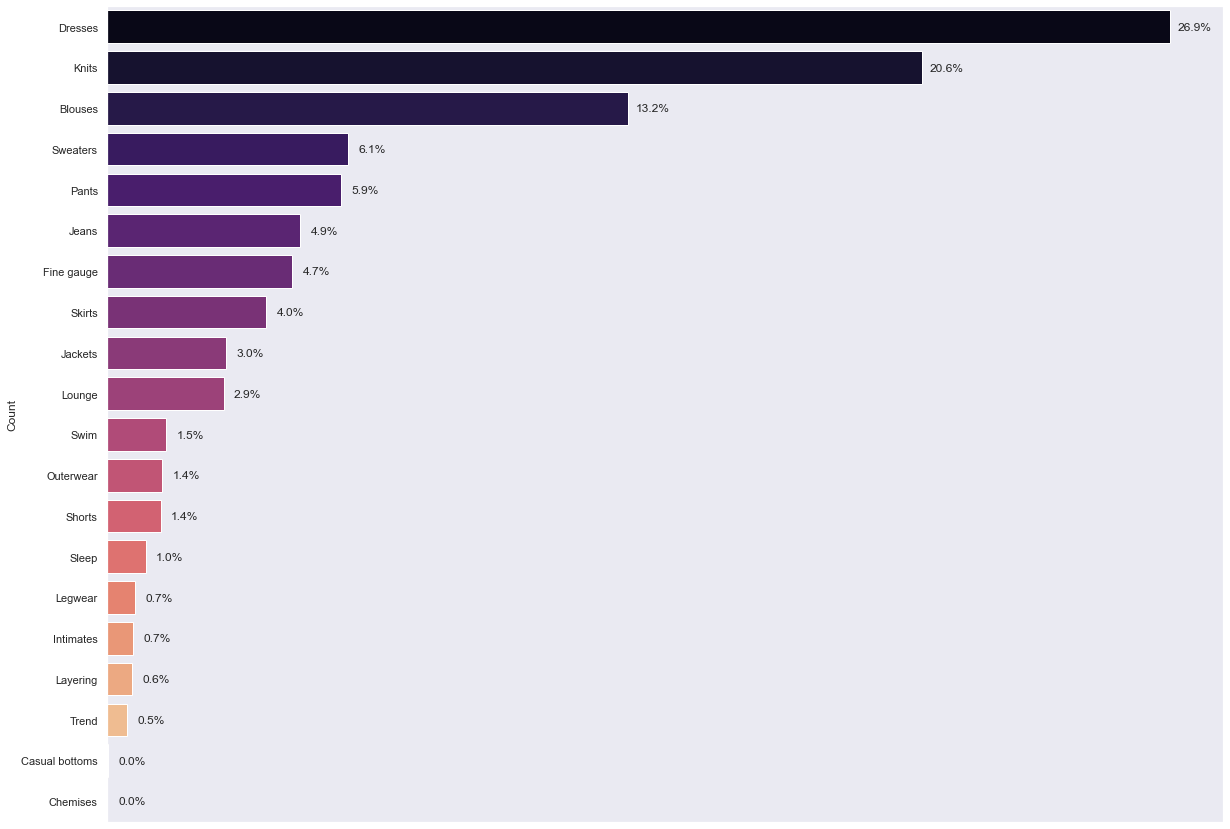

In [357]:
plt.figure(figsize=(20, 15))
ax = sns.countplot(data = dressesData, y ='class_name', palette=SNS_PALETTE, order = dressesData['class_name'].value_counts().index)

w, h = plt.gcf().get_size_inches()
total = float(len(dressesData['class_name']))
for p in ax.patches:
    percentage =  '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()+fig.dpi*w/10
    y = p.get_y() + p.get_height()*h/25
    ax.annotate(percentage, (x, y),ha='center')

ax.set(xlabel='Class of the Cloth',
       ylabel = 'Count')
ax.set(xticklabels=[]) 
ax.set(xlabel=None)
ax.tick_params(bottom=False)
plt.show()


In [358]:
minCountVal = dressesData['class_name'].value_counts().idxmin()
dressesData.drop(dressesData.index[dressesData['class_name'] == minCountVal], inplace = True)
# FIXME remove cat minCountVal

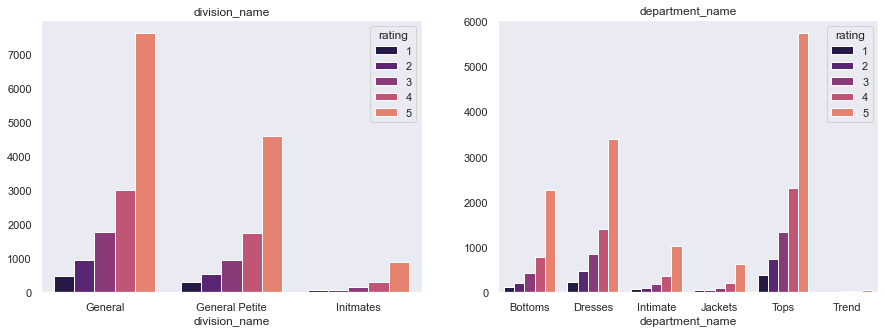

In [371]:
xColumnsName = ['division_name', 'department_name']
plt.figure(figsize=(15, 5))
for i, c in enumerate(xColumnsName):
    ax = plt.subplot(1, 2, i+1)
    sns.countplot(data = dressesData, x = c, hue ='rating')
    ax.set(title = c)
    ax.set(ylabel=None)
plt.show()

<AxesSubplot:xlabel='class_name', ylabel='rating'>

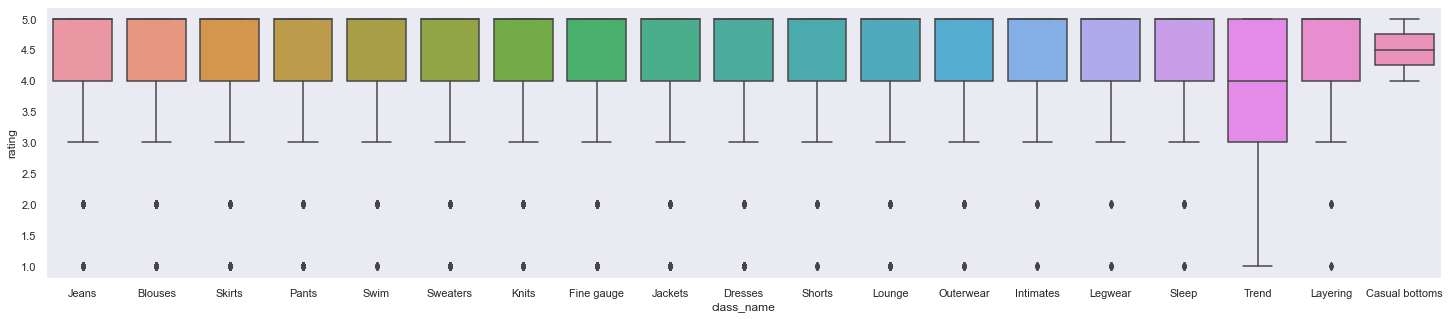

In [372]:
plt.figure(figsize=(25, 5))
sns.boxplot(data = dressesData, x='class_name', y='rating')

<AxesSubplot:xlabel='class_name', ylabel='age'>

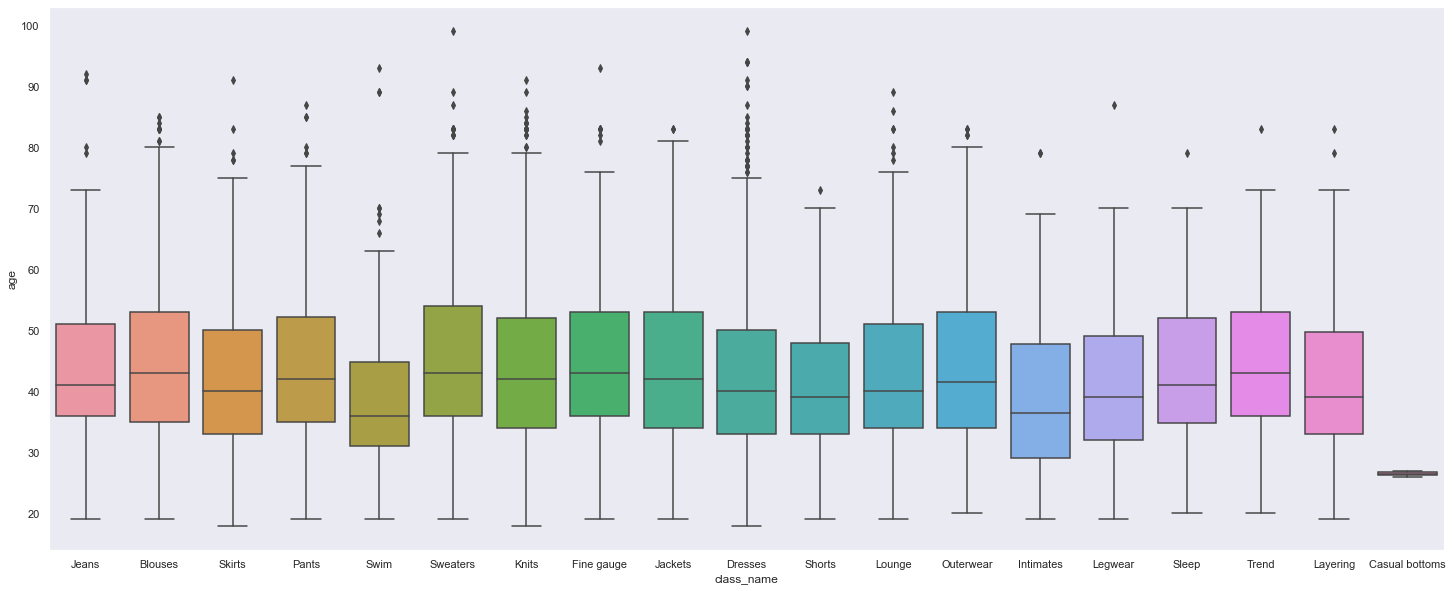

In [377]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=dressesData, y='age', x='class_name')

<AxesSubplot:xlabel='recommend_index', ylabel='count'>

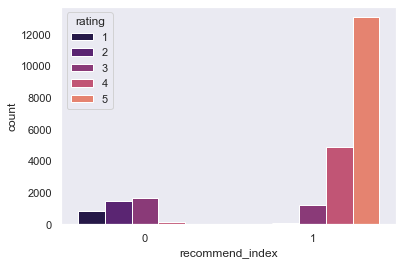

In [403]:
sns.countplot(data = dressesData, x='recommend_index', hue='rating')